## Neural network (Deep learning)

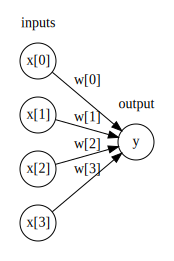

In [1]:
import mglearn

# visualizing logistic regression as
# it's similar to a simple neural network
display(mglearn.plots.plot_logistic_regression_graph())

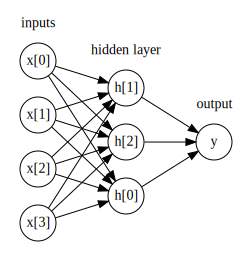

In [2]:
# visualization of neural network with hidden layer
display(mglearn.plots.plot_single_hidden_layer_graph())

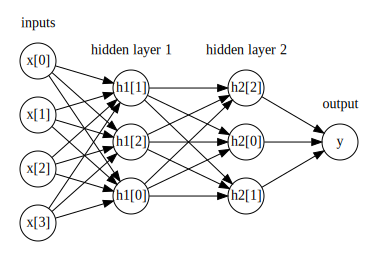

In [3]:
mglearn.plots.plot_two_hidden_layer_graph()

## Tuning neural networks

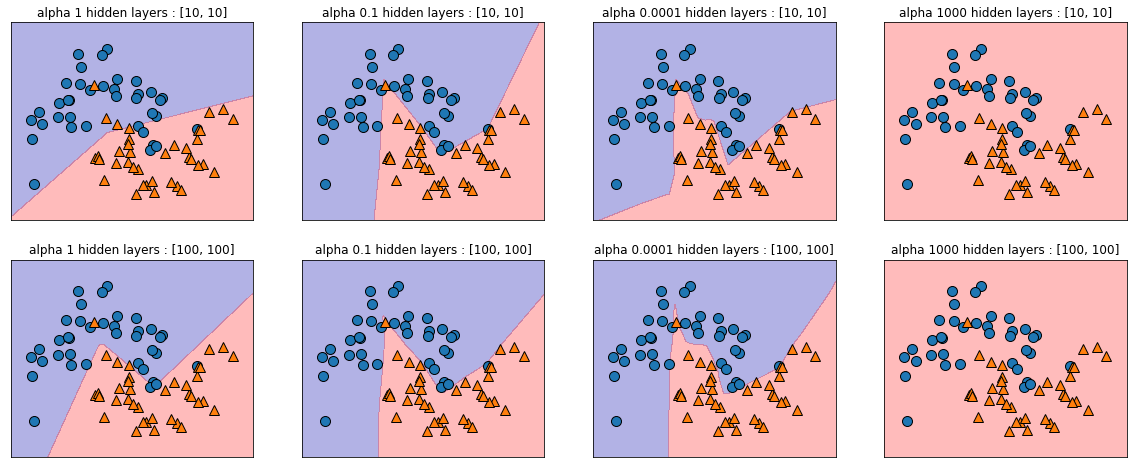

In [10]:
# tuning the model parameters to classify dataset make_moon
# in this code just tuning the hidden layers
# and alpha (L1 regularization)
# the rest parameters depends on the solver

from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, hiddenNodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [1, 0.1, .0001, 1000]):
        mlp = MLPClassifier(solver='lbfgs', alpha=alpha, 
                            hidden_layer_sizes=(hiddenNodes, hiddenNodes),
                            random_state=0)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("alpha {} hidden layers : [{}, {}]".format(alpha, hiddenNodes, hiddenNodes))


In [12]:
# using MLP with breast cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

mlp = MLPClassifier().fit(X_train, y_train)
print("Train score {}".format(mlp.score(X_train, y_train)))
print("Test score {}".format(mlp.score(X_test, y_test)))

Train score 0.9295774647887324
Test score 0.965034965034965


In [13]:
# the model could be underfitting
# trying to normalize the data

min_X_train = X_train.min(axis=0)
range_X_train = (X_train - min_X_train).max(axis=0)

scaled_X_train = (X_train - min_X_train) / range_X_train
scaled_X_test = (X_test - min_X_train) / range_X_train

mlp = MLPClassifier().fit(scaled_X_train, y_train)
print("Train score {}".format(mlp.score(scaled_X_train, y_train)))
print("Test score {}".format(mlp.score(scaled_X_test, y_test)))

Train score 0.9812206572769953
Test score 0.9790209790209791


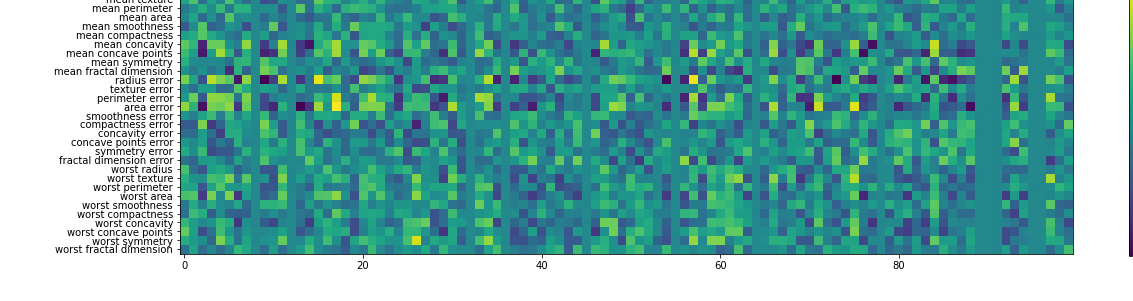

In [17]:
# visualizing the coefficients of the parameters
# to analyze the network

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.colorbar()